In [228]:
import pandas as pd
import numpy as np

In [229]:
data = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\wine_cleared.csv')
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [230]:
data['price_round'] = data['price'].round().astype(int)

In [231]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_5840\1904379352.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


In [232]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [233]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [234]:
data['country'].value_counts().head(3)

country
US        54504
France    22093
Italy     19540
Name: count, dtype: int64

In [235]:
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)

In [236]:
data['is_france'].sum()

22093

In [237]:
data['is_italy'].sum()

19540

In [238]:
data['old_wine'] = data['year'].apply(lambda x: 1 if pd.notna(x) and int(x) < 2010 else 0) 

In [239]:
data['old_wine'].sum()

39781

In [240]:
regex = r'\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [242]:
country_population = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [243]:
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


In [244]:
data.join(country_population.set_index('country'), on='country')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_italy,is_france,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,1,0,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0,Erben Müller-Burggraef,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,0,1,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,0,1,0,Alsace,"68,035,000"


In [245]:
country_area = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\country_area.csv', sep=';')
countries = list(country_area['country'])
areas = list(country_area['area'])
dict_ = dict(zip(countries, areas))
dict_
data['area_country'] = data['country'].map(dict_)
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_italy,is_france,old_wine,locality,area_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,1,0,0,Etna,301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro,92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley,9372610.0


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [247]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_italy,is_france,old_wine,locality,area_country
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Viognier,Gård,22,2014,1,0,0,0,Columbia Valley (WA,9372610.0


In [248]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [249]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [250]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [251]:
calls['time_connection'].sum()

89

In [252]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)

In [253]:
calls['is_connection'].sum()

7

In [254]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [255]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [256]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = pd.to_datetime('01.12.2022') - data['year']
data['years_diff'].max()

Timedelta('98627 days 00:00:00')

In [257]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [258]:
import category_encoders as ce

In [259]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [260]:
ord_encoder = ce.OrdinalEncoder(mapping=[{'col': 'size',
                                          'mapping': {'xxs': 1, 'xs': 2, 's': 3, 'm': 4, 'l': 5, 'xxl': 6}}])
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [261]:
ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

In [262]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [263]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


In [264]:
data.shape

(129971, 23)

In [265]:
ord_encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
type_bin = ord_encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


In [266]:
data.shape

(129971, 43)

In [267]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [268]:
data.shape

(129971, 43)

In [269]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
data.shape

(129971, 49)

In [270]:
data['taster_twitter_handle'].nunique()

16

In [271]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)
data.shape

(129971, 54)

In [272]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [273]:
ord_encoder = ce.OrdinalEncoder()
product = ord_encoder.fit_transform(df['product'])
df = pd.concat([df, product], axis=1)

nom_encoder = ce.OneHotEncoder(cols=['payment_type'], use_cat_names=True)
type = nom_encoder.fit_transform(df['payment_type'])
df = pd.concat([df, type], axis=1)
df

,product,price,payment_type,product,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,1,0,0
1,Product2,3600,Visa,2,0,1,0
2,Product3,7500,Amex,3,0,0,1


In [274]:
# encoder = ce.OneHotEncoder(cols=['product','payment_type'])
# cols = encoder.fit_transform(df[['product','payment_type']])
# df = pd.concat([df, cols], axis=1)
# df

In [275]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [276]:
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


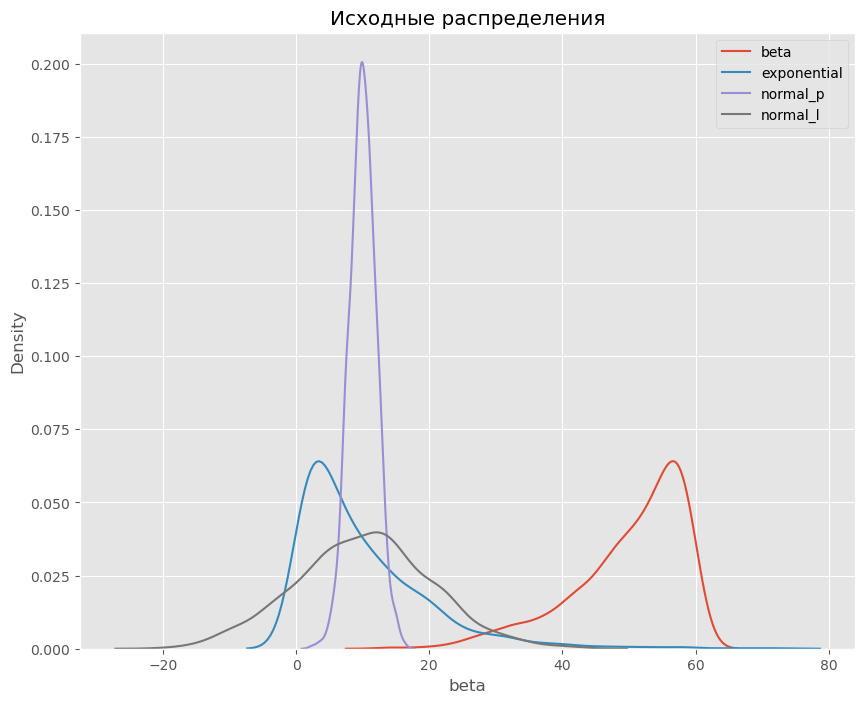

In [277]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [278]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


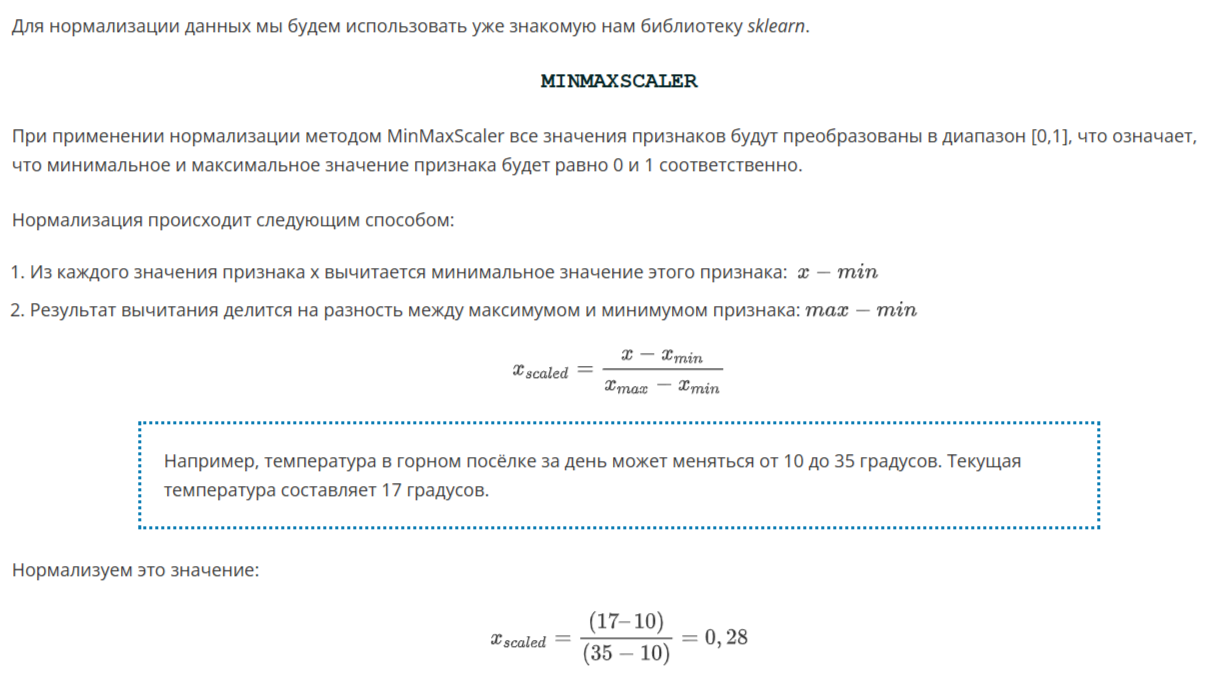

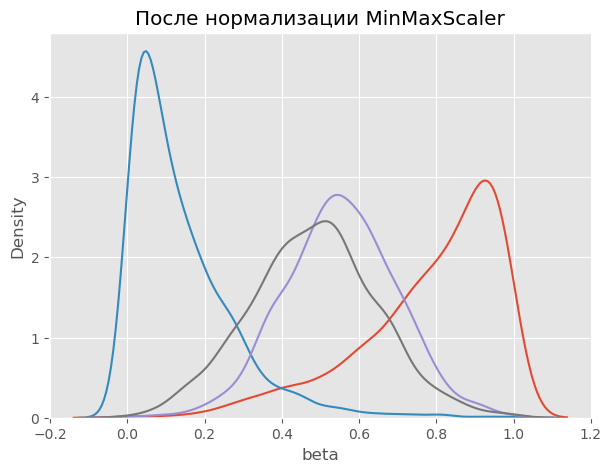

In [279]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 5))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1);

In [280]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


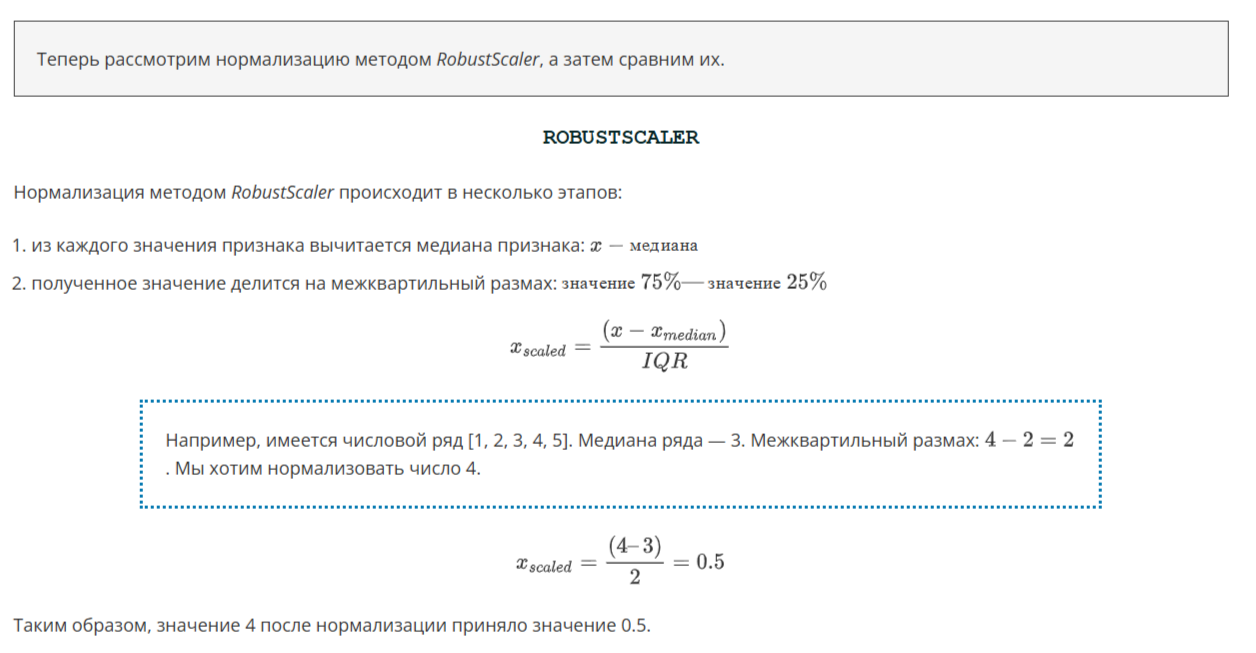

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

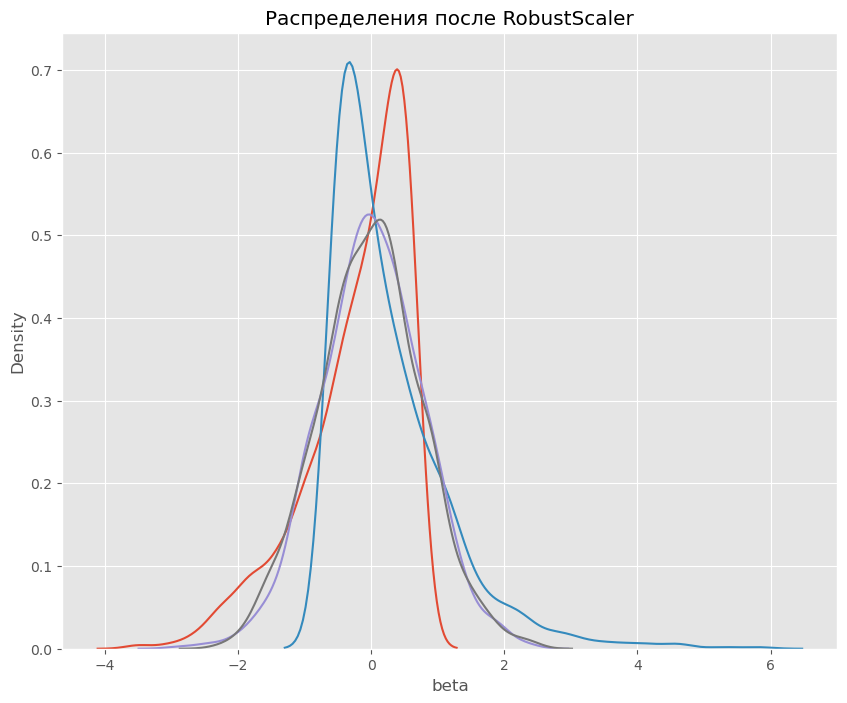

In [281]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [282]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


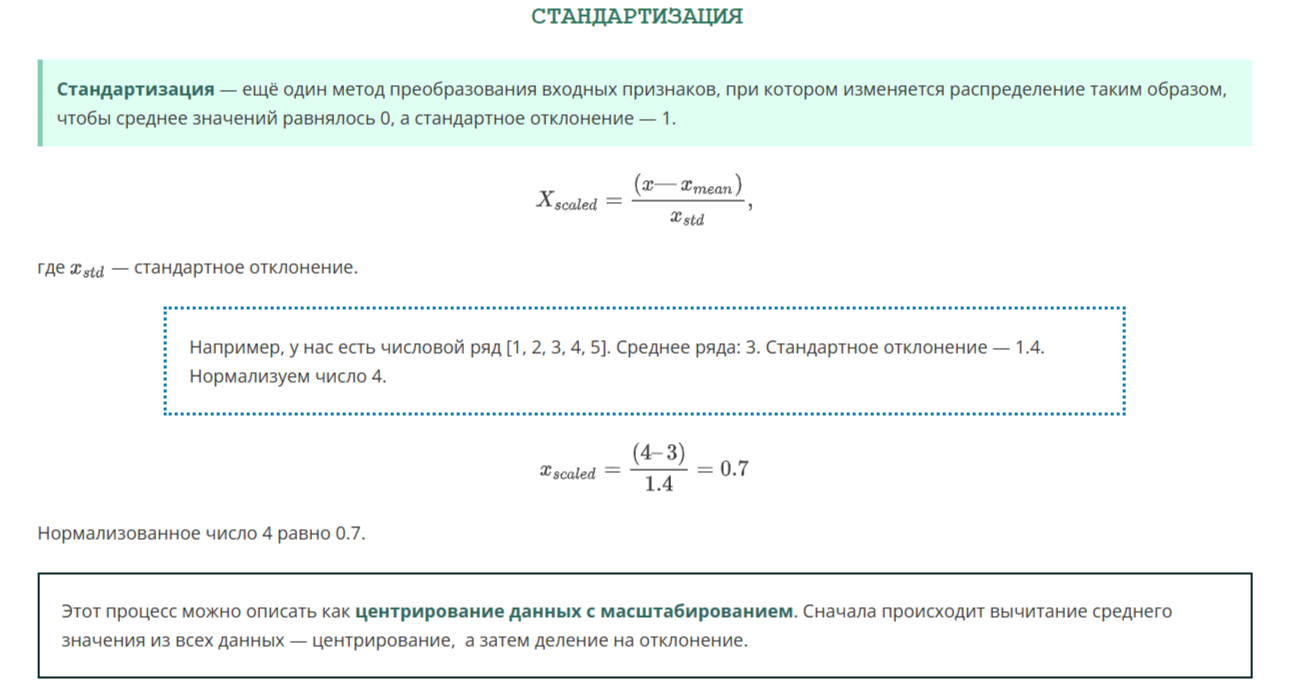

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

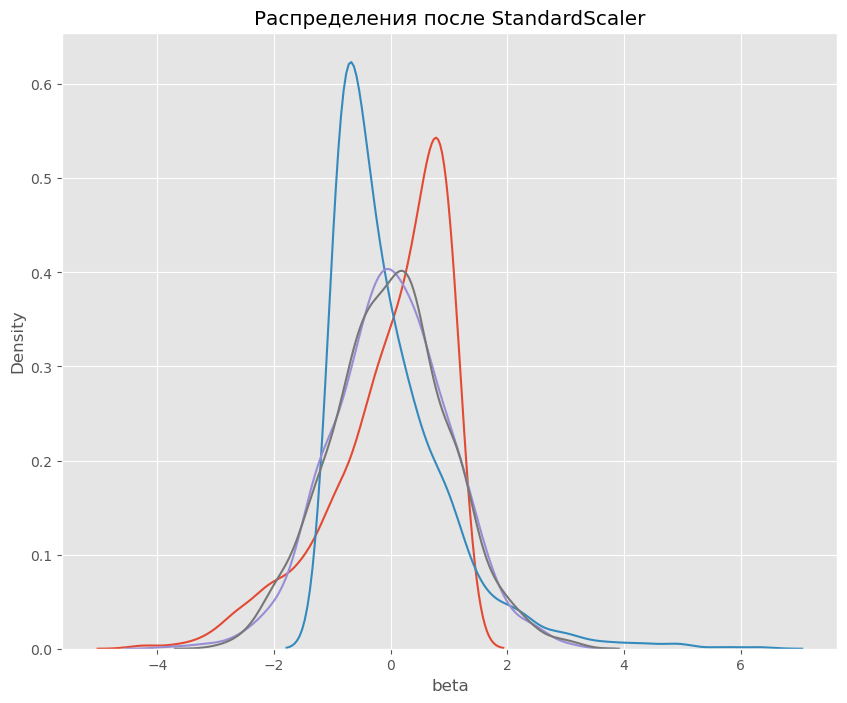

In [283]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

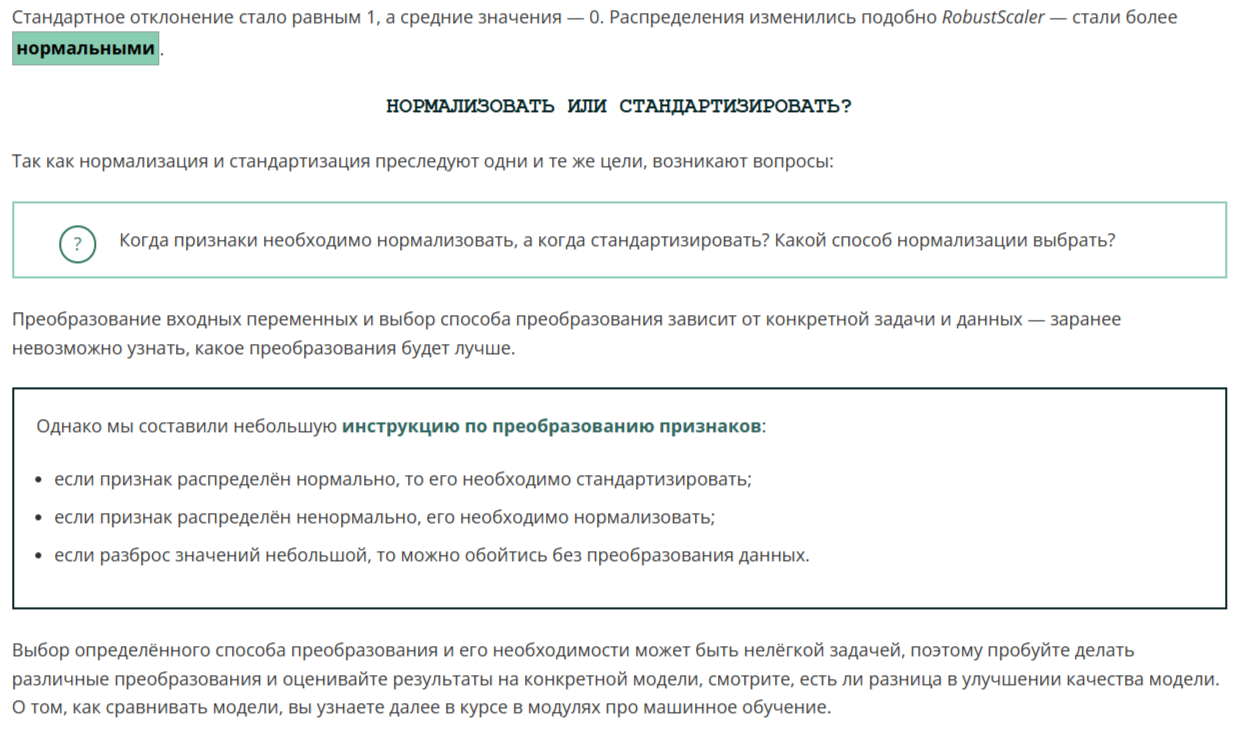

<Axes: xlabel='price', ylabel='Density'>

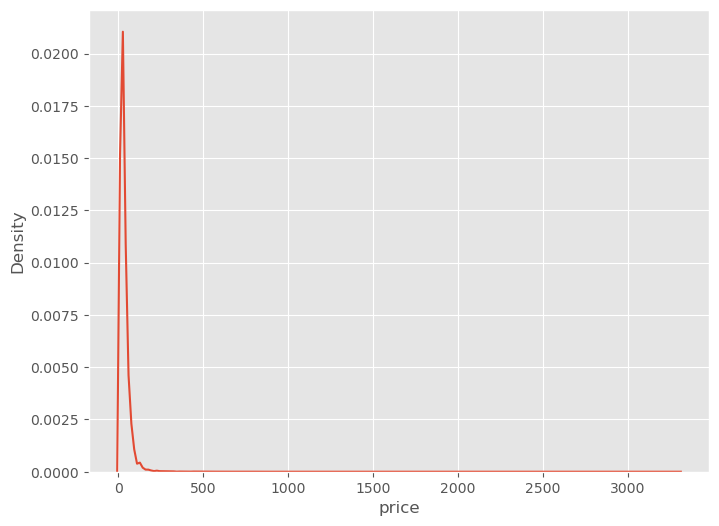

In [284]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['price'])

In [285]:
names_of_columns = list(data.columns)

<Axes: xlabel='price', ylabel='Density'>

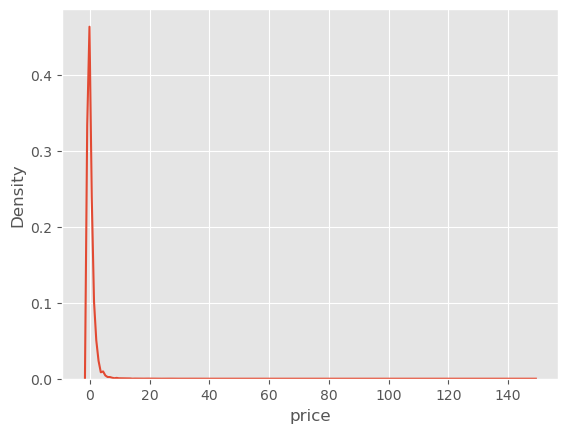

In [286]:
r_scaler = preprocessing.RobustScaler()
data['price'] = r_scaler.fit_transform(data[['price']])
sns.kdeplot(data['price'])

In [287]:
data['price'].sum()

43501.229482424984

In [288]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

In [289]:
s_scaler = preprocessing.StandardScaler()
data['price_standart'] = s_scaler.fit_transform(data[['price']])

In [290]:
data['price_standart'][129968]

-0.13551812448719305

In [291]:
iris = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


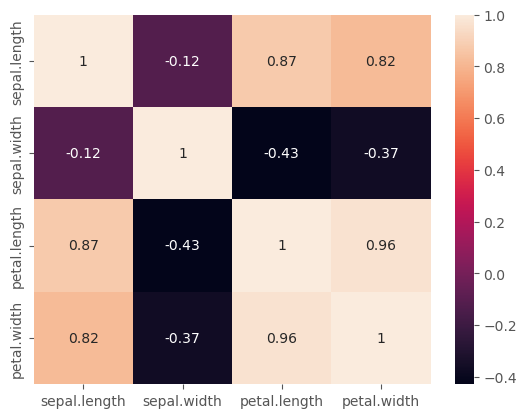

In [292]:
sns.heatmap(iris.corr(numeric_only=True),  annot=True);

In [293]:
iris = iris.drop(['petal.width'], axis=1)

In [294]:
iris = iris.drop(['petal.length'], axis=1)

In [295]:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [296]:
data['price_round'] = data['price'].round()

<Axes: >

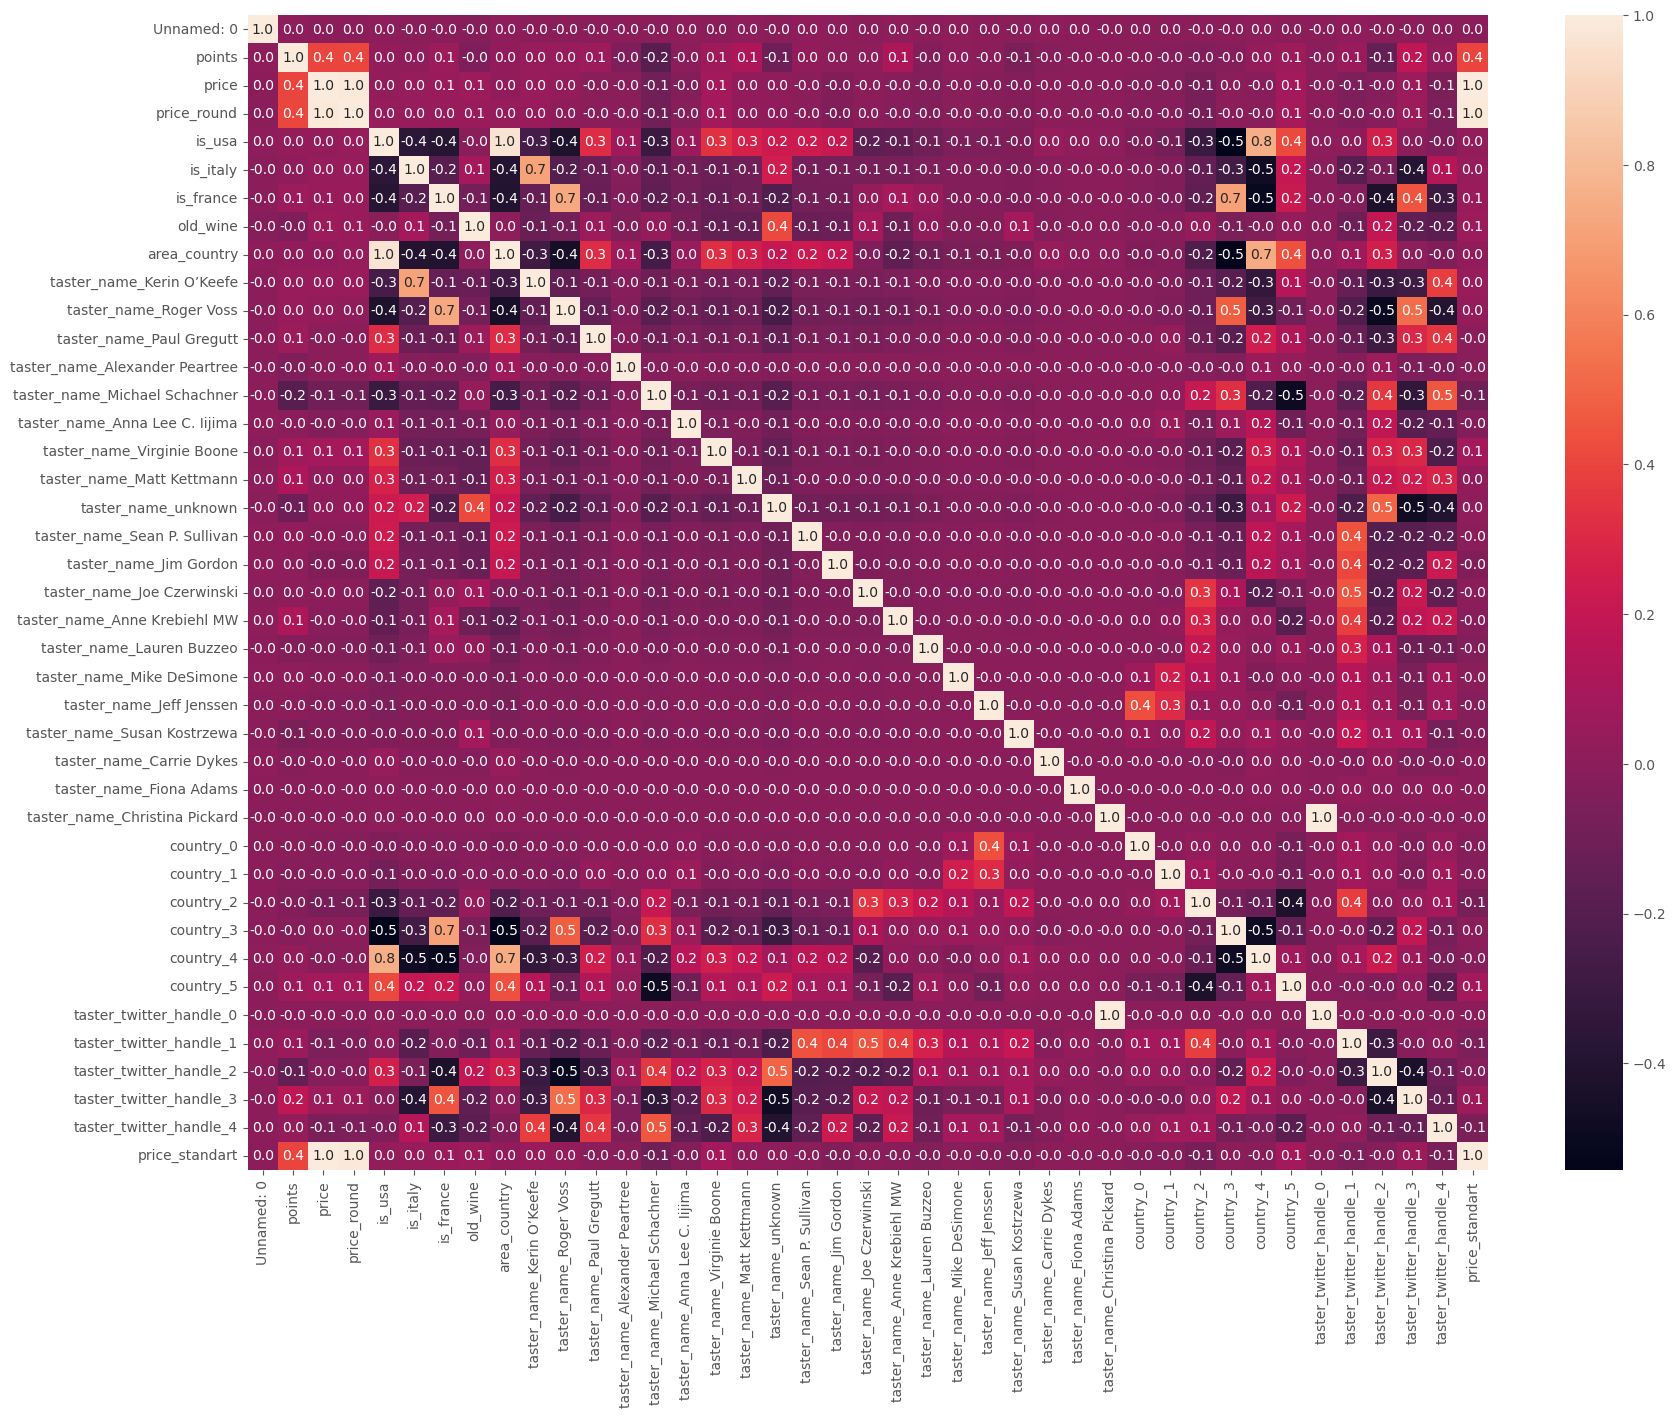

In [299]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.1f')